# Prediction of PM2.5 concentration particle in Chengdu


PM2.5 refers to particulate matter with a diameter of 2.5 micrometers or smaller. It consists of tiny particles or droplets in the air that are small enough to be inhaled into the respiratory system. These particles can originate from various sources, including vehicle emissions, industrial processes, wildfires, and natural activities.

The health implications of PM2.5 are significant because these fine particles can penetrate deep into the lungs and even enter the bloodstream. Exposure to elevated levels of PM2.5 is associated with respiratory and cardiovascular problems, including asthma, bronchitis, and heart attacks. Due to their small size, PM2.5 particles can also affect visibility and contribute to air pollution.

Task: Develop a model that can predict the concentration of PM2.5 particles in the air in Chengdu, based on various factors. Additionally, consider the precise location in Chengdu, which is a US Post, as a significant feature influencing air quality.


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, \
    precision_score, recall_score, f1_score
from scipy.stats import mode

# EDA - Exploratory Data Analysis

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)


In [4]:
df.head()

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0


In [5]:
df.describe()

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,24420.000000,24594.000000,28900.000000,52055.000000,52049.000000,52063.000000,52057.000000,52051.000000,49629.000000,49629.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,77.507002,75.555867,83.407612,12.274556,73.224697,1014.621985,17.698158,4.347654,0.107161,0.591557
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,60.150955,60.337735,57.239585,7.531846,17.819088,8.111353,7.843607,6.423547,1.023369,5.117582
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-3.000000,0.000000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,37.000000,35.000000,44.000000,6.000000,61.440000,1008.000000,11.000000,1.000000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,60.000000,57.000000,68.000000,13.000000,77.010000,1014.900000,18.000000,2.000000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,99.000000,97.000000,105.000000,19.000000,87.750000,1021.000000,24.000000,5.000000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,662.000000,573.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,120.000000,57.000000,169.400000


In [6]:
# Drop features from other locations
df.drop(['PM_Caotangsi', 'PM_Shahepu'], axis=1, inplace=True)

# Drop features 'precipitation' and 'Iprec'
df.drop(['No', 'precipitation', 'Iprec'], axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum() / df.shape[0] * 100)

year           0.000000
month          0.000000
day            0.000000
hour           0.000000
season         0.000000
PM_US Post    45.040316
DEWP           1.006009
HUMI           1.017420
PRES           0.990796
TEMP           1.002206
cbwd           0.990796
Iws            1.013616
dtype: float64


* Handling missing values

In [7]:
# For the most crucial feature, 'PM_US Post', we check whether more than 85% of data is missing for any year.
# If more than 85% of data is missing, then that year may not be considered relevant.
gbdf = df.groupby(by='year').agg('count')
del_year = gbdf.index[gbdf['PM_US Post'] / gbdf['month'] < 0.15]
df = df[~df['year'].isin(del_year)]
print(df['year'].unique()) # 2010, 2011 are dropped


[2012 2013 2014 2015]


In [8]:
df['PM_US Post'].fillna(method='ffill', inplace=True)
df.dropna(axis=0, inplace=True)
# Provera da li ima jos nedostajucih vrednosti
print(df.isna().sum())

year          0
month         0
day           0
hour          0
season        0
PM_US Post    0
DEWP          0
HUMI          0
PRES          0
TEMP          0
cbwd          0
Iws           0
dtype: int64


* Univariate analysis of 'PM_US Post' feature

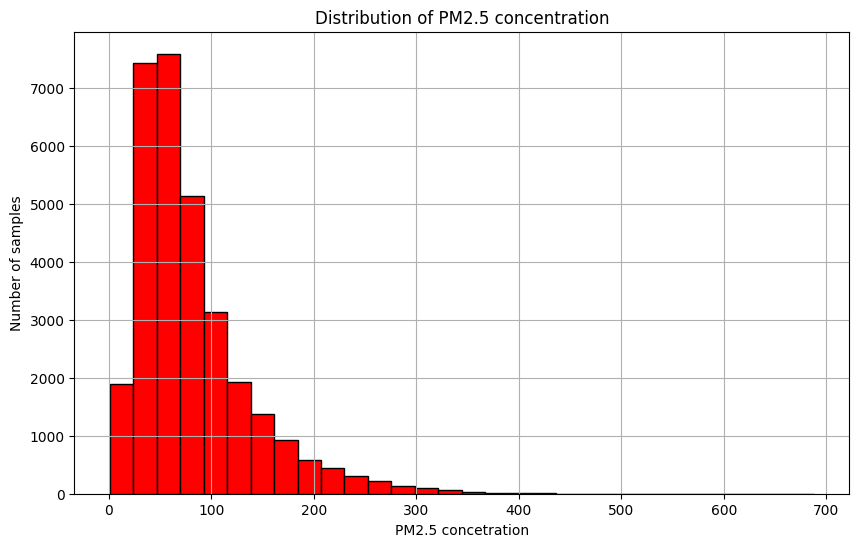

In [10]:
# Frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(df['PM_US Post'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of PM2.5 concentration')
plt.xlabel('PM2.5 concetration')
plt.ylabel('Number of samples')
plt.grid(True)
plt.show()

In [11]:
# Central tendency measures
mean_value = np.mean(df['PM_US Post'])
median_value = np.median(df['PM_US Post'])
mode_value = mode(df['PM_US Post'], keepdims = True).mode[0]

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

Mean: 81.13614888590946
Median: 67.0
Mode: 67.0


In [12]:
# Calculating IQR
Q1 = df['PM_US Post'].quantile(0.25)
Q3 = df['PM_US Post'].quantile(0.75)
IQR = Q3 - Q1

# Define borders for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 5 * IQR

# Identfication of outliers
outliers = df[(df['PM_US Post'] < lower_bound) | (df['PM_US Post'] > upper_bound)]['PM_US Post']

print("Identificated outliers:")
print(outliers)

Identificated outliers:
26581    409.0
26582    387.0
26650    389.0
27264    487.0
27265    388.0
33126    401.0
33127    403.0
33128    436.0
33129    428.0
35784    688.0
35785    685.0
35786    549.0
35790    491.0
35791    427.0
35792    420.0
35795    433.0
35796    449.0
35797    425.0
35798    416.0
35799    395.0
52547    394.0
52548    399.0
52549    399.0
Name: PM_US Post, dtype: float64


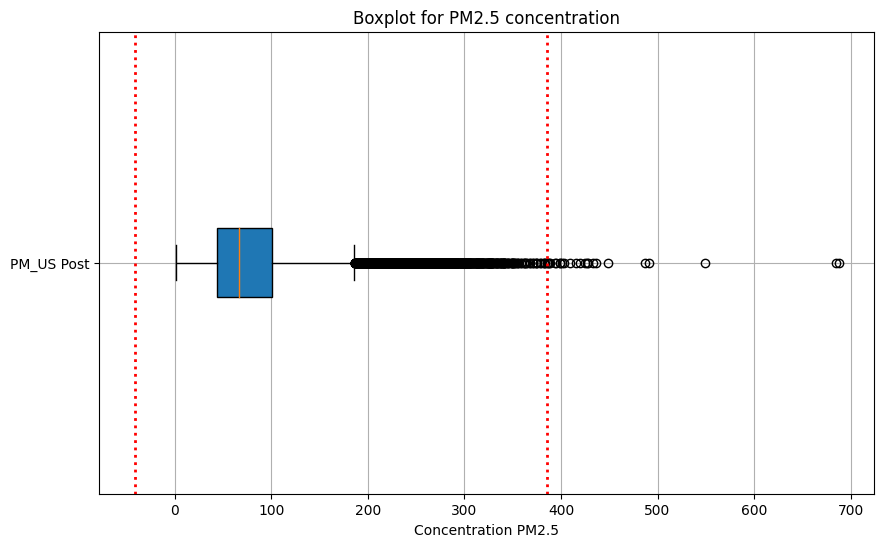

In [13]:
# Visual representation of outlier values
plt.figure(figsize=(10, 6))
plt.boxplot(df['PM_US Post'], vert=False, patch_artist=True)
plt.title('Boxplot for PM2.5 concentration')
plt.xlabel('Concentration PM2.5')
plt.yticks([1], ['PM_US Post'])
plt.grid(True)
plt.axvline(lower_bound, color='r', linestyle='dotted', linewidth=2, label=f'Outlier border (lower): {lower_bound:.2f}')
plt.axvline(upper_bound, color='r', linestyle='dotted', linewidth=2, label=f'Outlier border (upper): {upper_bound:.2f}')
plt.show()

We have values that are significantly outside the outlier range, but these are not something we should exclude from our data. It is not an error; rather, these values are from January 31, 2014, during the celebration of the Chinese New Year. The concentration of particles was exceptionally high on that day due to the use of fireworks and similar means of celebration.

* Multivariate analysis of 'PM_US Post' and other relevant features


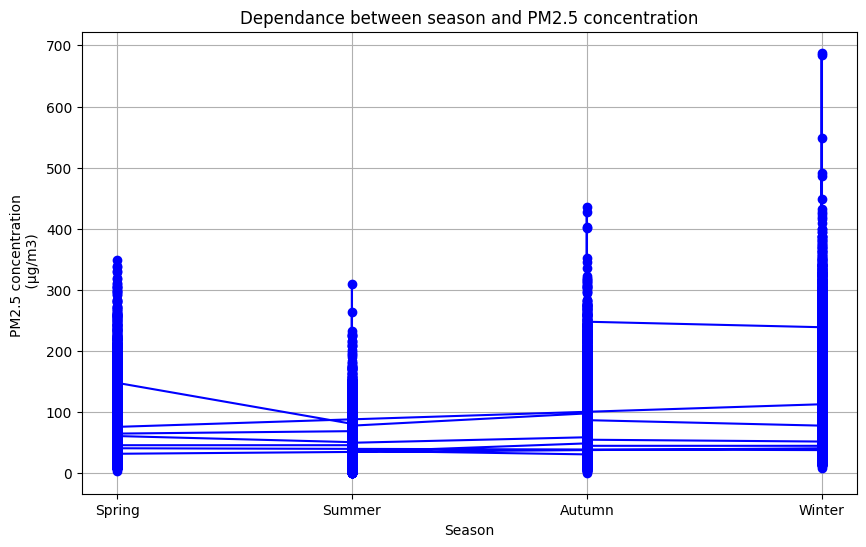

In [14]:
# Dependance between season and PM2.5 concentration
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}

plt.figure(figsize=(10, 6))
plt.plot(df['season'], df['PM_US Post'], marker='o', linestyle='-', color='b')
plt.title('Dependance between season and PM2.5 concentration')
plt.xlabel("Season")
plt.ylabel("PM2.5 concentration \n (µg/m3)")
plt.xticks(df['season'].unique(), [season_mapping[season] for season in df['season'].unique()])

plt.grid(True)
plt.show()

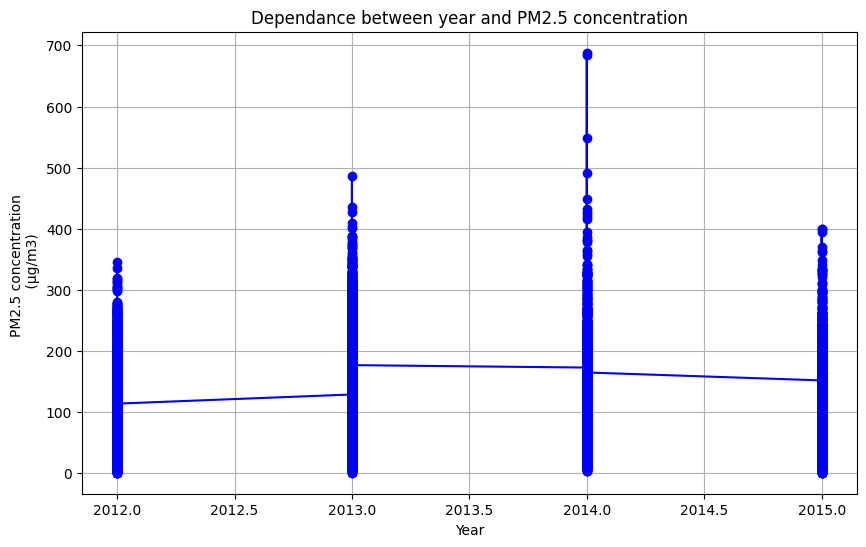

In [15]:
# Dependance between year and PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['PM_US Post'], marker='o', linestyle='-', color='b')
plt.title('Dependance between year and PM2.5 concentration')
plt.xlabel('Year')
plt.ylabel('PM2.5 concentration \n (µg/m3)')
plt.grid(True)
plt.show()

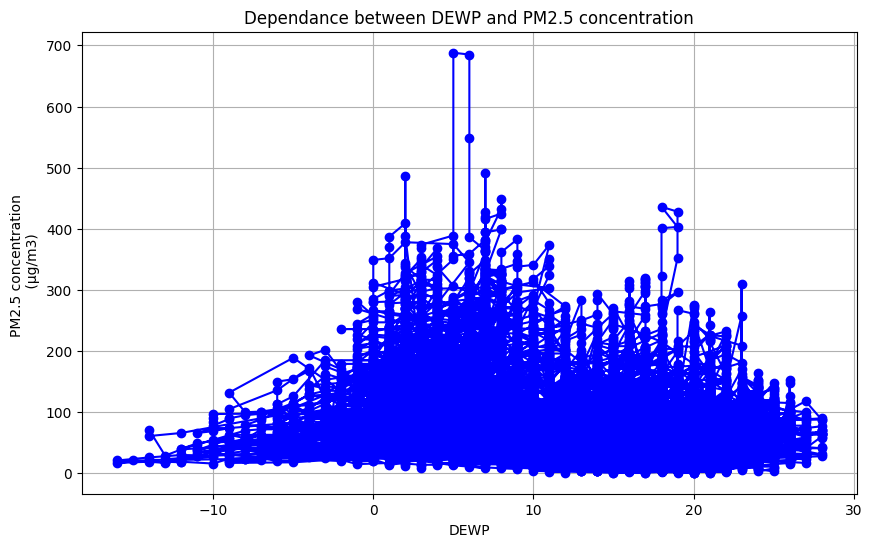

In [16]:
# Dependance between DEWP and PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.plot(df['DEWP'], df['PM_US Post'], marker='o', linestyle='-', color='b')
plt.title('Dependance between DEWP and PM2.5 concentration')
plt.xlabel("DEWP")
plt.ylabel("PM2.5 concentration \n (µg/m3)")
plt.grid(True)
plt.show()

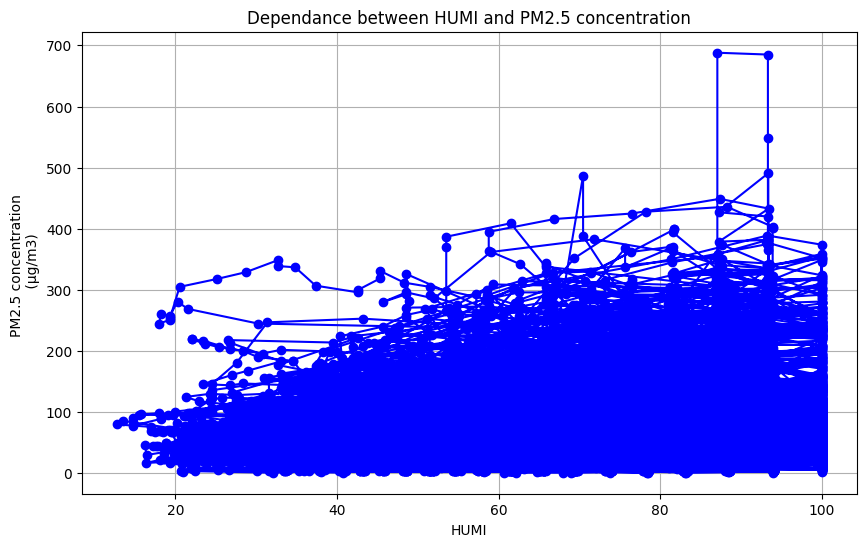

In [17]:
# Dependance between HUMI and PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.plot(df['HUMI'], df['PM_US Post'], marker='o', color='b')
plt.title('Dependance between HUMI and PM2.5 concentration')
plt.xlabel("HUMI")
plt.ylabel("PM2.5 concentration \n (µg/m3)")
plt.grid(True)
plt.show()

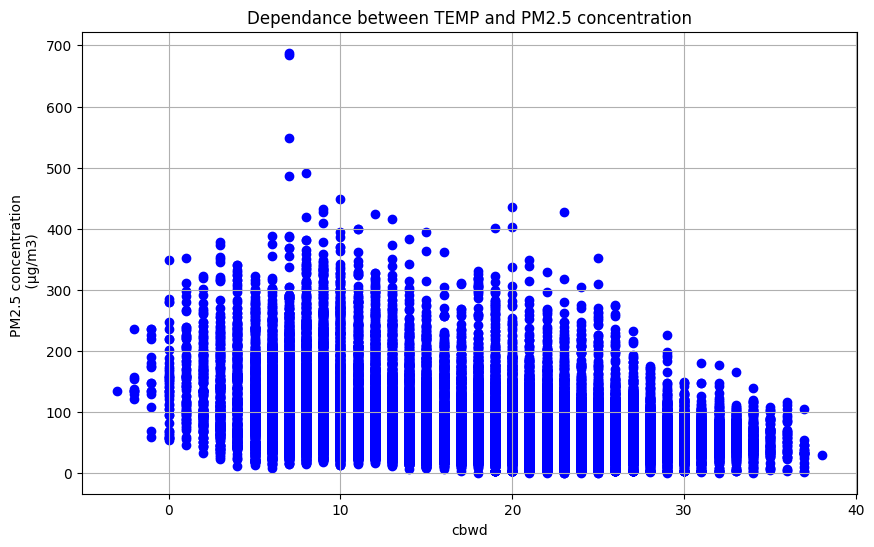

In [18]:
# Dependance between TEMP and PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['PM_US Post'], marker='o', linestyle='-', color='b')
plt.title('Dependance between TEMP and PM2.5 concentration')
plt.xlabel("cbwd")
plt.ylabel("PM2.5 concentration \n (µg/m3)")
plt.grid(True)
plt.show()

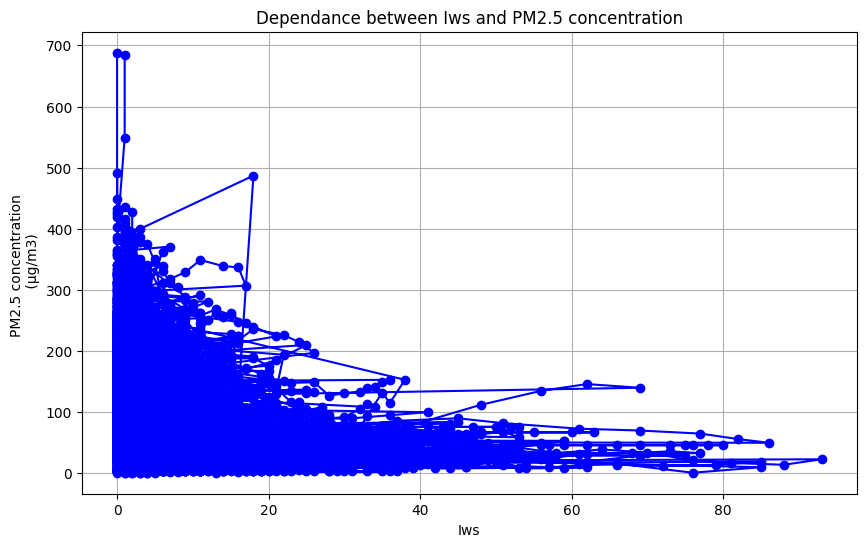

In [19]:
# Dependance between Iws and PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.plot(df['Iws'], df['PM_US Post'], marker='o', linestyle='-', color='b')
plt.title('Dependance between Iws and PM2.5 concentration')
plt.xlabel("Iws")
plt.ylabel("PM2.5 concentration \n (µg/m3)")
plt.grid(True)
plt.show()


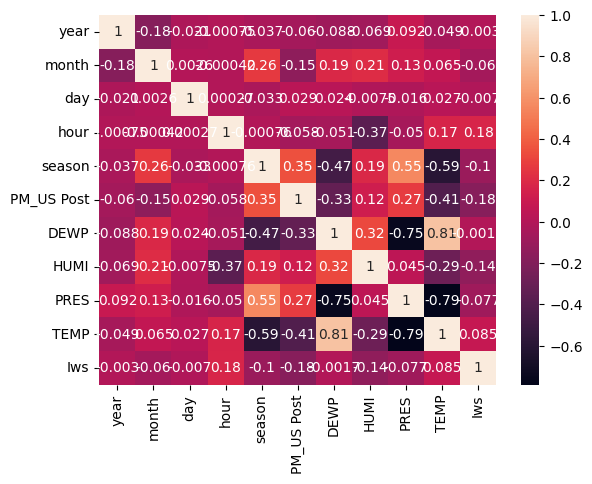

In [20]:
# Correlation matrix
corr_mat = df.corr(numeric_only=True)
sb.heatmap(corr_mat, annot=True)
plt.show()

# Linear Regression

In [21]:
df.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws
count,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000,31326.000000
mean,2013.660378,6.934368,15.862766,11.502873,2.530422,81.136149,12.844442,72.620508,1014.338361,18.467280,4.351369
std,1.066081,3.385048,8.833613,6.921480,1.062583,56.264176,7.422863,18.398494,8.073005,7.651107,6.492452
min,2012.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-3.000000,0.000000
25%,2013.000000,4.000000,8.000000,6.000000,2.000000,44.000000,7.000000,60.270000,1008.000000,12.000000,1.000000
50%,2014.000000,7.000000,16.000000,12.000000,3.000000,67.000000,14.000000,76.350000,1014.000000,19.000000,2.000000
75%,2015.000000,10.000000,24.000000,18.000000,3.000000,101.000000,19.000000,87.840000,1021.000000,24.000000,5.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,93.000000


In [22]:
# Convert categorical features into numerical
df.loc[df['cbwd'] == 'cv', 'cbwd'] = 0
df.loc[df['cbwd'] == 'SW', 'cbwd'] = 1
df.loc[df['cbwd'] == 'SE', 'cbwd'] = 2
df.loc[df['cbwd'] == 'NW', 'cbwd'] = 3
df.loc[df['cbwd'] == 'NE', 'cbwd'] = 4

In [23]:
x = df.drop(['PM_US Post'], axis=1).copy()
y = df['PM_US Post'].copy()

# Create test and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, train_size=0.7, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [24]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1 - (1 - r2) * (N - 1) / (N - d - 1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    res = pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

Mean squared error:  2311.3652076970398
Mean absolute error:  34.97449286199799
Root mean squared error:  48.07665969778932
R2 score:  0.2659725723345219
R2 adjusted score:  0.2655390760548956
        y      y_pred
0    70.0   51.835247
1    22.0   64.600408
2   306.0  137.453586
3    70.0   78.829959
4    45.0   81.009259
5    50.0  128.872695
6    60.0   89.742458
7    98.0   71.161013
8    67.0   67.689742
9    53.0   48.604021
10  206.0  129.715639
11   23.0   58.293035
12   76.0   62.176157
13   40.0   76.811672
14  227.0  165.227541
15   87.0   55.065044
16   46.0   73.696159
17   36.0   78.707218
18  123.0  116.750322
19   41.0   54.411216


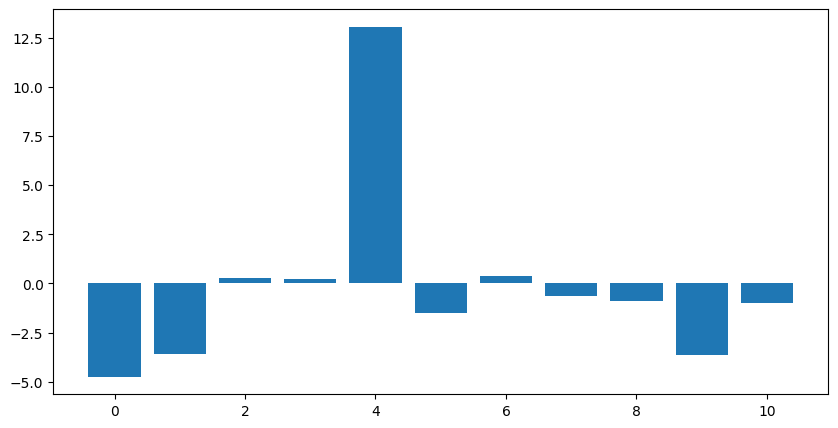

Coefficients:  [-4.7409834  -3.59747284  0.26447541  0.23898183 13.04497884 -1.4847714
  0.36306639 -0.656487   -0.88926226 -3.63028849 -0.99838412]


In [25]:
# 1) Linear regression with hypothesis y=b0+b1x1+b2x2+...+bnxn
first_regression_model = LinearRegression(fit_intercept=True)
first_regression_model.fit(x_train, y_train)
y_predicted = first_regression_model.predict(x_test)
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

plt.figure(figsize=(10, 5))
plt.bar(range(len(first_regression_model.coef_)), first_regression_model.coef_)
plt.show()

print("Coefficients: ", first_regression_model.coef_)


In [26]:
# Feature standardization - Z normalization
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)

x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)

Mean squared error:  1676.7229594240644
Mean absolute error:  30.010415436826335
Root mean squared error:  40.947807748694736
R2 score:  0.4675178821957007
R2 adjusted score:  0.46530876996127546
        y      y_pred
0    70.0   64.377006
1    22.0   56.815518
2   306.0  181.418725
3    70.0   79.512646
4    45.0   74.008915
5    50.0   84.199104
6    60.0  101.593626
7    98.0   70.713960
8    67.0   50.052677
9    53.0   36.241331
10  206.0  153.857780
11   23.0   47.044791
12   76.0   59.014561
13   40.0   67.973628
14  227.0  185.402499
15   87.0   38.828931
16   46.0   40.843602
17   36.0   85.338539
18  123.0  143.483112
19   41.0   65.294389


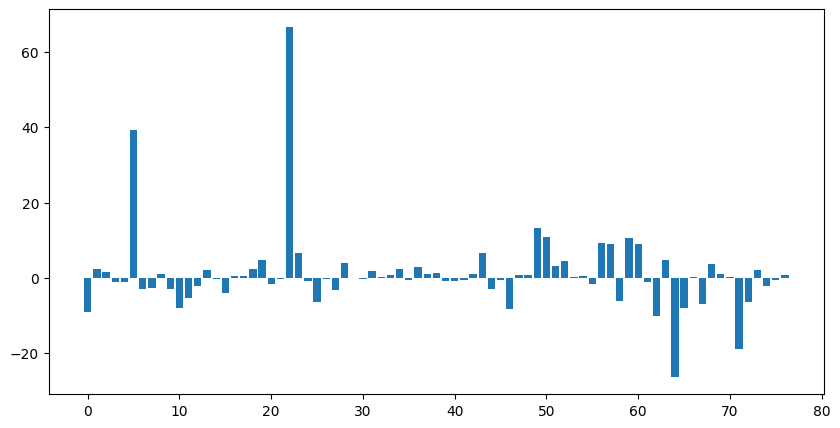

Coefficients [ -8.99160008   2.46324237   1.6347543   -1.10927182  -1.09174202
  39.2302124   -2.89784679  -2.72892308   1.11905718  -2.81672034
  -8.05540228  -5.25574606  -2.0706378    1.98352363  -0.26606748
  -4.04114941   0.503934     0.6070389    2.40353882   4.68481159
  -1.59862755  -0.32682226  66.67101346   6.49259535  -0.75509767
  -6.39207284  -0.3977752   -3.09225558   3.90424444  -0.11055936
  -0.16135406   1.76250103   0.14118773   0.656863     2.48196126
  -0.66658224   2.92190037   0.96379172   1.18292037  -0.88032905
  -0.82145317  -0.53664565   1.07968536   6.56823228  -2.92546317
  -0.51745726  -8.38329738   0.77658304   0.77401713  13.17055178
  10.84312798   3.1049628    4.37138097   0.34945686   0.52881848
  -1.66319113   9.1590404    9.11238197  -6.01746305  10.65097399
   9.10540178  -1.06934525 -10.05970602   4.67148958 -26.25095136
  -7.99621524   0.11212229  -6.86239647   3.69903213   1.16026561
   0.21354087 -18.76990691  -6.50579451   2.01928775  -2.038560

In [27]:
# Linear regression with hypothesis y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

regression_model_degree = LinearRegression()
regression_model_degree.fit(x_inter_train, y_train)
y_predicted = regression_model_degree.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10, 5))
plt.bar(range(len(regression_model_degree.coef_)), regression_model_degree.coef_)
plt.show()
print("Coefficients", regression_model_degree.coef_)

Mean squared error:  1676.6744999333366
Mean absolute error:  30.007006963916634
Root mean squared error:  40.947216021768035
R2 score:  0.467533271626677
R2 adjusted score:  0.4653242232384903
        y      y_pred
0    70.0   64.281930
1    22.0   56.889938
2   306.0  181.229275
3    70.0   79.546154
4    45.0   74.003411
5    50.0   84.182891
6    60.0  101.730983
7    98.0   70.743253
8    67.0   50.120597
9    53.0   36.427265
10  206.0  153.665257
11   23.0   47.135716
12   76.0   59.179306
13   40.0   67.931316
14  227.0  185.663504
15   87.0   38.830080
16   46.0   41.014294
17   36.0   85.566256
18  123.0  143.316815
19   41.0   65.431316


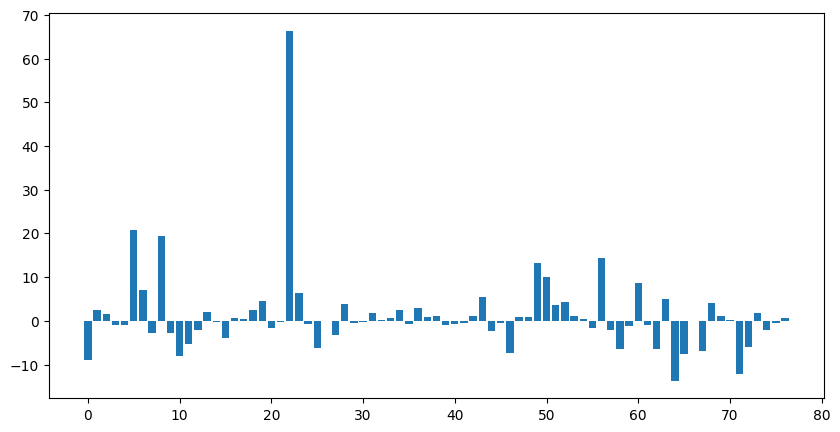

Coefficients - Ridge:  [-8.97823683e+00  2.40359828e+00  1.64397708e+00 -1.06522271e+00
 -9.77589126e-01  2.06839069e+01  7.02544485e+00 -2.74813095e+00
  1.93372953e+01 -2.82558526e+00 -8.05602612e+00 -5.26925313e+00
 -2.08711296e+00  1.98003984e+00 -2.64815726e-01 -4.02643065e+00
  7.43334879e-01  4.69238315e-01  2.40988110e+00  4.44060974e+00
 -1.60126714e+00 -3.27882697e-01  6.63817286e+01  6.45940640e+00
 -7.70887398e-01 -6.32922375e+00  2.96448218e-02 -3.33655857e+00
  3.89626332e+00 -4.92224280e-01 -1.58719113e-01  1.76313704e+00
  1.46784562e-01  6.57376796e-01  2.47800834e+00 -6.57897562e-01
  2.92125532e+00  9.74747083e-01  1.17532272e+00 -8.79770205e-01
 -8.21447183e-01 -5.45672990e-01  1.09286916e+00  5.45953155e+00
 -2.30530480e+00 -5.12463120e-01 -7.25900466e+00  7.80725827e-01
  7.65195964e-01  1.31417117e+01  1.00483240e+01  3.58965662e+00
  4.37447572e+00  1.07672110e+00  5.26367268e-01 -1.66656559e+00
  1.42878987e+01 -2.02861225e+00 -6.46584925e+00 -1.10757663e+00
  

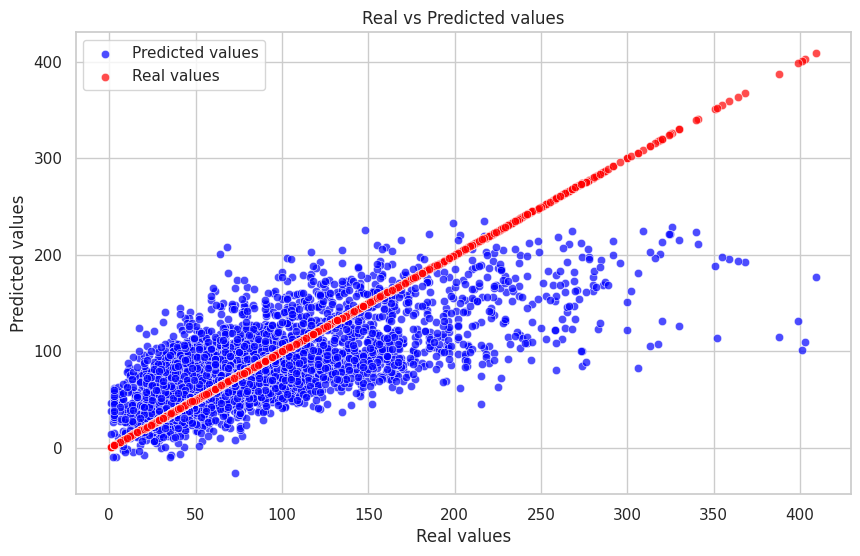

In [28]:
# Ridge regression
ridge_model = Ridge(alpha=4)
ridge_model.fit(x_inter_train, y_train)
y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10, 5))
plt.bar(range(len(ridge_model.coef_)), ridge_model.coef_)
plt.show()
print("Coefficients - Ridge: ", ridge_model.coef_)

# Prikazivanje koeficijenata
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sb.scatterplot(x=y_test, y=y_predicted, color='blue', alpha=0.7, label='Predicted values')
sb.scatterplot(x=y_test, y=y_test, color='red', alpha=0.7, label='Real values')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Real vs Predicted values")
plt.show()

# kNN - k-nearest neighbour classifier


In [29]:
# Adding a column where we will describe the danger based on PM2.5 particle levels.
new_df = df.assign(danger='NAN')
# Adding values to the 'danger' column based on the values of the 'PMUS Post' column.
new_df.loc[new_df['PM_US Post'] < 55.5, 'danger'] = 'safe'
new_df.loc[(new_df['PM_US Post'] > 55.4) & (new_df['PM_US Post'] < 150.5), 'danger'] = 'unsafe'
new_df.loc[new_df['PM_US Post'] > 150.4, 'danger'] = 'dangerous'

# Converting categorical features into numerical features.
new_df.loc[new_df['danger'] == 'safe', 'danger'] = 0
new_df.loc[new_df['danger'] == 'unsafe', 'danger'] = 1
new_df.loc[new_df['danger'] == 'dangerous', 'danger'] = 2

new_df.loc[new_df['cbwd'] == 'cv', 'cbwd'] = 0
new_df.loc[new_df['cbwd'] == 'SW', 'cbwd'] = 1
new_df.loc[new_df['cbwd'] == 'SE', 'cbwd'] = 2
new_df.loc[new_df['cbwd'] == 'NW', 'cbwd'] = 3
new_df.loc[new_df['cbwd'] == 'NE', 'cbwd'] = 4

Xtr = new_df.iloc[:, :-1] 
Ytr = new_df.iloc[:, -1].astype('int')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(Xtr, Ytr, test_size=0.30, train_size=0.70, random_state=42)

In [31]:
# Confusion matrix for the 'safe' class
def evaluation_classif_class_safe(conf_mat):
    TPc = conf_mat[0, 0]
    TNc1 = conf_mat[1, 1]
    TNc2 = conf_mat[1, 2]
    TNc3 = conf_mat[2, 1]
    TNc4 = conf_mat[2, 2]
    FPc1 = conf_mat[1, 0]
    FPc2 = conf_mat[2, 0]
    FNc1 = conf_mat[0, 1]
    FNc2 = conf_mat[0, 2]

    precision = TPc / (TPc + FPc1 + FPc2)
    accuracy = (TPc + TNc1 + TNc2 + TNc3 + TNc4) / (TPc + TNc1 + TNc2 + TNc3 + TNc4 + FPc1 + FPc2 + FNc1 + FNc2)
    sensitivity = TPc / (TPc + FPc1 + FPc2)
    specificity = (TNc1 + TNc2 + TNc3 + TNc4) / (TNc1 + TNc2 + TNc3 + TNc4 + FPc1 + FPc2)
    F_score = 2 * precision * sensitivity / (precision + sensitivity)
    print("Class safe: ")
    print('precision: ', precision)
    print('accuracy: ', accuracy)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    print('F score: ', F_score)
    print("")
    return accuracy


# Confusion matrix for the 'unsafe' class
def evaluation_classif_class_unsafe(conf_mat):
    TPp = conf_mat[1, 1]
    TNp1 = conf_mat[0, 0]
    TNp2 = conf_mat[0, 2]
    TNp3 = conf_mat[2, 0]
    TNp4 = conf_mat[2, 2]
    FPp1 = conf_mat[0, 1]
    FPp2 = conf_mat[2, 1]
    FNp1 = conf_mat[1, 0]
    FNp2 = conf_mat[1, 2]

    precision1 = TPp / (TPp + FPp1 + FPp2)
    accuracy1 = (TPp + TNp1 + TNp2 + TNp3 + TNp4) / (TPp + TNp1 + TNp2 + TNp3 + TNp4 + FPp1 + FPp2 + FNp1 + FNp2)
    sensitivity1 = TPp / (TPp + FPp1 + FPp2)
    specificity1 = (TNp1 + TNp2 + TNp3 + TNp4) / (TNp1 + TNp2 + TNp3 + TNp4 + FPp1 + FPp2)
    F_score1 = 2 * precision1 * sensitivity1 / (precision1 + sensitivity1)
    print("Class unsafe: ")
    print('precision: ', precision1)
    print('accuracy: ', accuracy1)
    print('sensitivity/recall: ', sensitivity1)
    print('specificity: ', specificity1)
    print('F score: ', F_score1)
    print("")
    return accuracy1


# Confusion matrix for the 'dangerous' class
def evaluation_classif_class_dangerous(conf_mat):
    TPps = conf_mat[2, 2]
    TNps1 = conf_mat[0, 0]
    TNps2 = conf_mat[0, 1]
    TNps3 = conf_mat[1, 0]
    TNps4 = conf_mat[1, 1]
    FPps1 = conf_mat[0, 2]
    FPps2 = conf_mat[1, 2]
    FNps1 = conf_mat[2, 0]
    FNps2 = conf_mat[2, 1]
    precision2 = TPps / (TPps + FPps1 + FPps2)
    accuracy2 = (TPps + TNps1 + TNps2 + TNps3 + TNps4) / (
            TPps + TNps1 + TNps2 + TNps3 + TNps4 + FPps1 + FPps2 + FNps1 + FNps2)
    sensitivity2 = TPps / (TPps + FPps1 + FPps2)
    specificity2 = (TNps1 + TNps2 + TNps3 + TNps4) / (TNps1 + TNps2 + TNps3 + TNps4 + FPps1 + FPps2)
    F_score2 = 2 * precision2 * sensitivity2 / (precision2 + sensitivity2)
    print("Class dangerous: ")
    print('precision: ', precision2)
    print('accuracy: ', accuracy2)
    print('sensitivity/recall: ', sensitivity2)
    print('specificity: ', specificity2)
    print('F score: ', F_score2)
    print("")
    return accuracy2


In [32]:
# kNN classifier on training set
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  
acc = []
best_accuracy = 0
best_params = {'metric': '', 'weights': '', 'n_neighbors': 0}

for m in ['euclidean', 'manhattan', 'chebyshev']:
    for d in ['distance', 'uniform']:
        for i in range(1, 14):
            indexes = kf.split(x_train, y_train)
            acc_t = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)), len(np.unique(y_train))))
            for train_index, test_index in indexes:
                knn = KNeighborsClassifier(n_neighbors=i, metric=m, weights=d)
                knn.fit(x_train.iloc[train_index, :], y_train.iloc[train_index])
                y_pred = knn.predict(x_train.iloc[test_index, :])
                acc_t.append(accuracy_score(y_train.iloc[test_index], y_pred))
                fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=[0, 1, 2])
            print('metric =', m, ', weight =', d, 'neighbor - i =', i, 'precision', np.mean(acc_t),
                  ' \na mat. konf. je:\n', fin_conf_mat)

            avg_accuracy = ((evaluation_classif_class_safe(fin_conf_mat) + evaluation_classif_class_unsafe(
                fin_conf_mat) + evaluation_classif_class_dangerous(fin_conf_mat)) / 3)
            print("Average accuracy of classifier: \n", avg_accuracy)
            acc.append(np.mean(acc_t))
            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_params = {'metric': m, 'weights': d, 'n_neighbors': i}
                
print('Best accuracy:', best_accuracy)
print('Best parameters:', best_params)            

metric = euclidean , weight = distance neighbor - i = 1 precision 0.9753284546716326  
a mat. konf. je:
 [[ 8412.   208.     0.]
 [  211. 10608.    55.]
 [    0.    67.  2367.]]
Class safe: 
precision:  0.9755305578105068
accuracy:  0.9808920102152499
sensitivity/recall:  0.9755305578105068
specificity:  0.9841448752629997
F score:  0.9755305578105068

Class unsafe: 
precision:  0.9747312321970045
accuracy:  0.9753283473184969
sensitivity/recall:  0.9747312321970045
specificity:  0.9751221277365659
F score:  0.9747312321970045

Class dangerous: 
precision:  0.9772914946325351
accuracy:  0.994436337103247
sensitivity/recall:  0.9772914946325351
specificity:  0.9971786190622756
F score:  0.9772914946325351

Average accuracy of classifier: 
 0.9835522315456645
metric = euclidean , weight = distance neighbor - i = 2 precision 0.9754196539420386  
a mat. konf. je:
 [[ 8415.   205.     0.]
 [  212. 10607.    55.]
 [    0.    67.  2367.]]
Class safe: 
precision:  0.9754259881766547
accuracy: 

In [33]:
# kNN classifier on test set
classifierknn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
classifierknn.fit(x_train, y_train)
y_pred1 = classifierknn.predict(x_test)
conf_mat1 = confusion_matrix(y_test, y_pred1)

print('Final confusion matrix: ')
print(conf_mat1)

avg_accuracy = ((evaluation_classif_class_safe(conf_mat1) + evaluation_classif_class_unsafe(
    conf_mat1) + evaluation_classif_class_dangerous(conf_mat1)) / 3)

print("Average accuracy: ", avg_accuracy)
print('Micro precision: ', precision_score(y_test, y_pred1, average='micro'))
print('Macro precision: ', precision_score(y_test, y_pred1, average='macro'))
print('Micro sensitivity/recall: ', recall_score(y_test, y_pred1, average='micro'))
print('Macro sensitivity/recall: ', recall_score(y_test, y_pred1, average='macro'))
print('Micro F score: ', f1_score(y_test, y_pred1, average='micro'))
print('Macro F score: ', f1_score(y_test, y_pred1, average='macro'))

Final confusion matrix: 
[[3606   47    0]
 [  47 4668   14]
 [   0   29  987]]
Class safe: 
precision:  0.9871338625787024
accuracy:  0.9899978718876357
sensitivity/recall:  0.9871338625787024
specificity:  0.9918189730200174
F score:  0.9871338625787024

Class unsafe: 
precision:  0.9839797639123102
accuracy:  0.9854224303043201
sensitivity/recall:  0.9839797639123102
specificity:  0.9837224245020347
F score:  0.9839797639123102

Class dangerous: 
precision:  0.986013986013986
accuracy:  0.9954245584166844
sensitivity/recall:  0.986013986013986
specificity:  0.998329754235266
F score:  0.986013986013986

Average accuracy:  0.99028162020288
Micro precision:  0.9854224303043201
Macro precision:  0.9857092041683329
Micro sensitivity/recall:  0.9854224303043201
Macro sensitivity/recall:  0.9818971408276651
Micro F score:  0.9854224303043201
Macro F score:  0.9837843055653259
